Accuracy: 0.8360655737704918
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



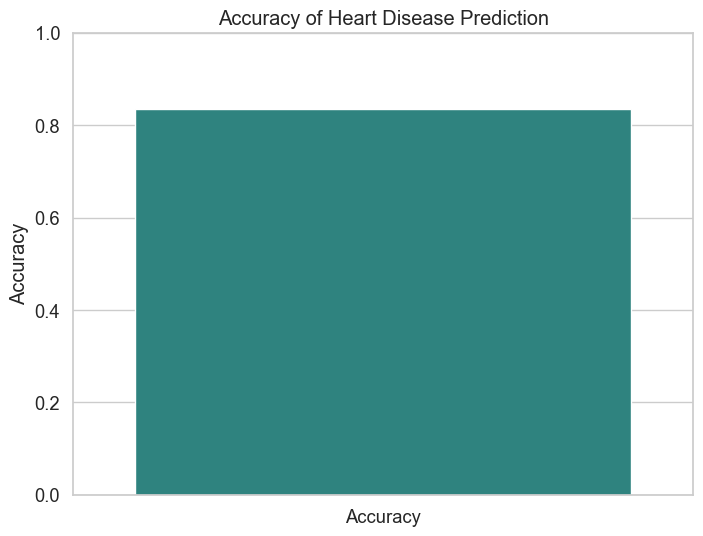

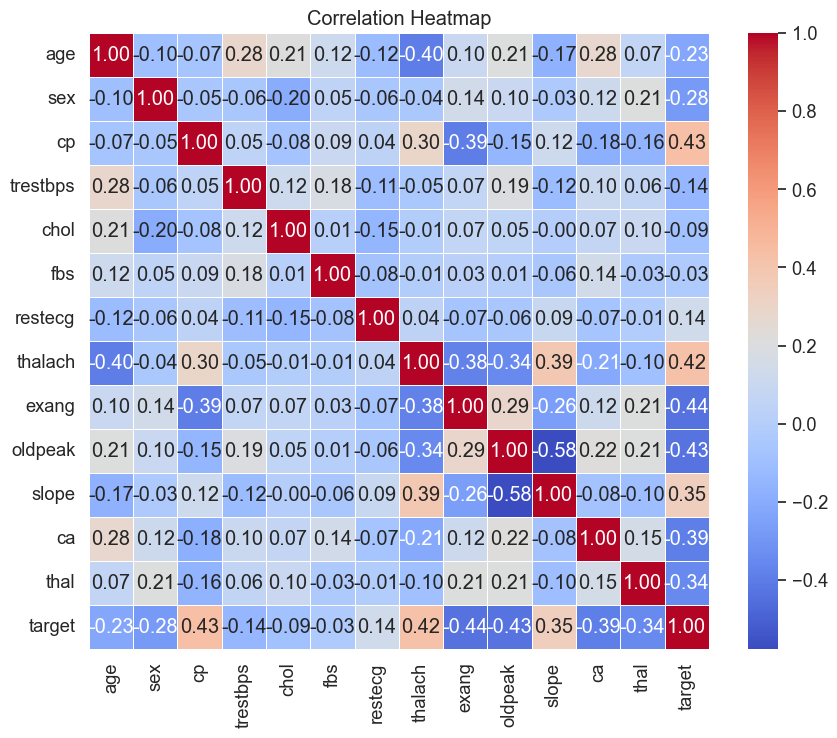

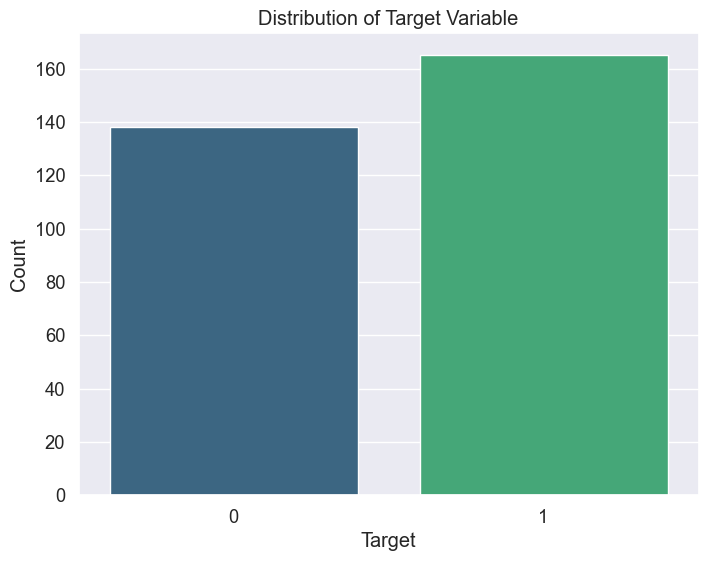

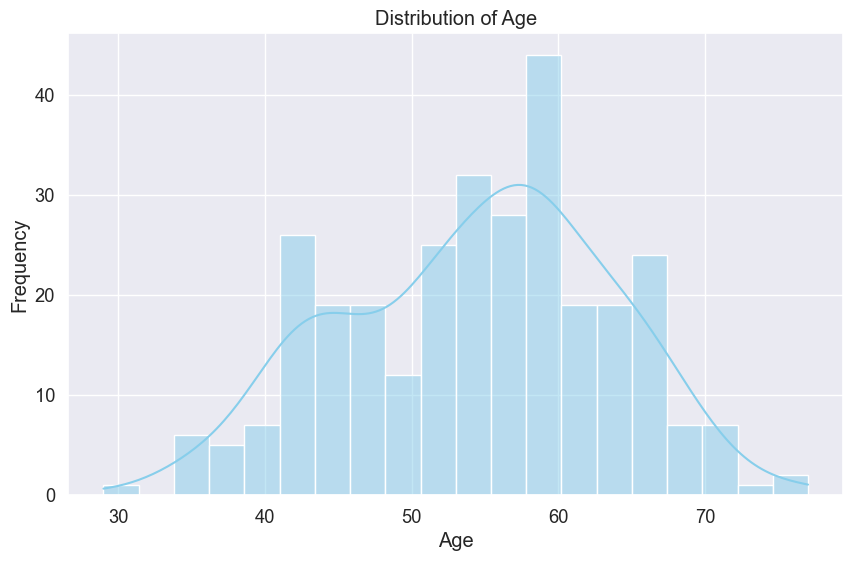

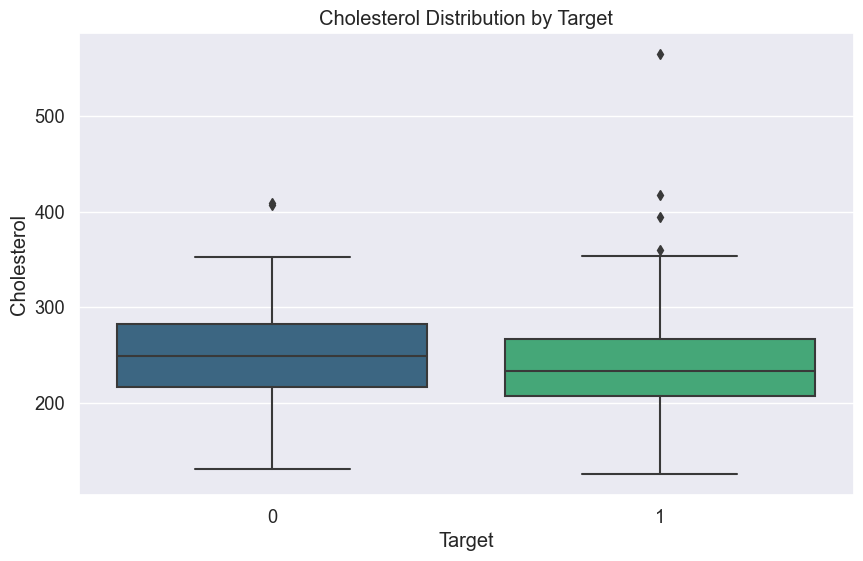

In [2]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("heart.csv")

# Split features and target
X = df.drop(columns=["target"])
y = df["target"]

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

# Preprocessing pipeline
numeric_transformer = SimpleImputer(strategy="mean")
categorical_transformer = SimpleImputer(strategy="most_frequent")
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Encode categorical features
X_encoded = pd.get_dummies(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the trained model
joblib.dump(model, "heart_disease_model.pkl")

# Plot accuracy graph
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(x=["Accuracy"], y=[accuracy], palette="viridis")
plt.title("Accuracy of Heart Disease Prediction")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Plot distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette="viridis")
plt.title("Distribution of Target Variable")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Plot cholesterol distribution by target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=df, palette="viridis")
plt.title("Cholesterol Distribution by Target")
plt.xlabel("Target")
plt.ylabel("Cholesterol")
plt.show()
